# Comparaison d'estimateurs - loi de Cauchy  

Ici on souhaite déterminer la meilleure façon de calculer une probabilité p tel que $p = \mathbb{P} \left( X > 2 \right)$ avec $X$ qui suit une loi de Cauchy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
densite_cauchy = lambda u: 1/(np.pi*(1+u**2))

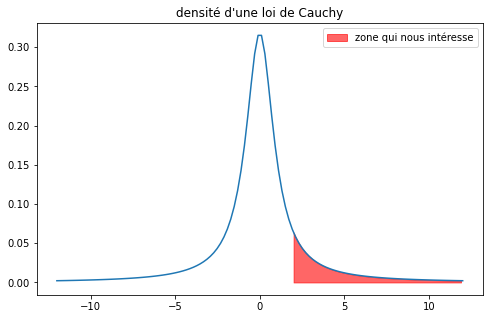

In [3]:
x = np.linspace(-12,12,120)
densite = densite_cauchy(x)

plt.subplots(figsize=(8,5))
plt.plot(x,densite)
section = np.arange(2, 12, 1/10.)
plt.fill_between(section,densite_cauchy(section), color = "r", alpha = 0.6, label = "zone qui nous intéresse")
plt.legend()
plt.title("densité d'une loi de Cauchy")
plt.show()

$\mathbf{Q1})$      
L'estimateur classique de Monte-Carlo est : 
$$
\begin{equation*}
    p_n = \frac{1}{n} \sum_{i=1}^{n} 1_{ \{ X_i > 2 \} } \quad  \left( X_i \right)_{\{ 1 \leq i \leq n \}} \text{une suite de v.a i.i.d de même loi que } X 
\end{equation*}
$$
La variance asympotitique $\sigma_n$ associée est :
$$
\begin{equation*}
    \sigma_n = \sqrt{n} \left( p_n - p \right) 
\end{equation*}
$$

$\mathbf{Q2})$ et $\mathbf{Q3})$

In [4]:
n = int(10e3)
p = 0.148

In [5]:
def estime_p(Mc = n):
    Xi = np.random.standard_cauchy(size = Mc )
    Xi = (Xi > 2)
    return(Xi.mean())

In [6]:
pk = estime_p()
print("la vraie valeur de p est {}".format(p))
print("pour n = {}, on trouve pk = {}".format(n,pk))

la vraie valeur de p est 0.148
pour n = 10000, on trouve pk = 0.1461


In [40]:
val_n = [100,300,500,800,1000,1500,2000,2500,3000,6000,8000,10000,14000,20000,25000,30000,40000,60000,80000]
val_pk = []
val_p = p*np.ones(len(val_n))
for n in val_n:
    val_pk.append(estime_p(n))
var_asympto = np.sqrt(np.array(val_n))*(np.array(val_pk) - p) 

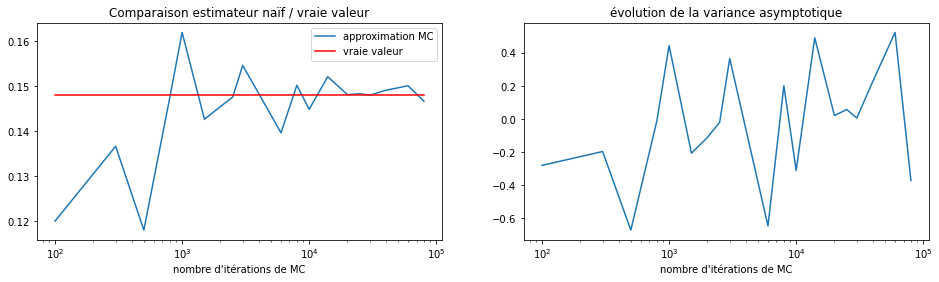

In [41]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

ax1.plot(val_n, val_pk, label="approximation MC")
ax1.plot(val_n, val_p, label="vraie valeur", color = "r")
ax1.set_title("Comparaison estimateur naïf / vraie valeur"); ax1.set_xlabel("nombre d'itérations de MC")
ax1.set_xscale("log")

ax2.plot(val_n, var_asympto, label="variance asymptotique")
ax2.set_title("évolution de la variance asymptotique"); ax2.set_xlabel("nombre d'itérations de MC")
ax2.set_xscale("log")
ax1.legend(); plt.show()

On voit donc que pour calculer notre proba, on converge assez lentement, il faut un grand nombre de tirages pour s'assurer que l'on ait une valeur suffisament proche, ce qui se traduit bien par la variance asymptotique qui malgré un nombre conséquents de tirages reste assez élevé.

$\mathbf{Q4})$ et $\mathbf{Q5})$ 

L'utilisation de Monte-Carlo de façon naïve nous oblige à faire un nombre importants de tirages. Une réecriture de la proba $p$ pourrait nous aider à trouver une amélioration.
$$
\begin{align*}
    p &= \mathbb{P} \left( X > 2 \right) \\
    &= 1 - \mathbb{P} \left( X \leq 2 \right) \\
    &= 1 - \mathbb{P} \left( X < 0 \right) + \mathbb{P} \left( 0 < X < 2 \right) \\
    &= 1 - \frac{1}{2} + \mathbb{P} \left( 0 < X < 2 \right) \quad \text{par symétrie de la densité d'une loi de Cauchy}\\
    &= \frac{1}{2} -  \int_{0}^{2} \frac{1}{\pi \left( 1 + u^2 \right)} \mathrm{d}u \\
    &= \frac{1}{2} - 2 \int_{0}^{2} \frac{1}{2} \frac{1}{\pi \left( 1 + u^2 \right)} \mathrm{d}u \\
    &= \frac{1}{2} - 2 \mathbb{E} \left[ \frac{1}{\pi \left( 1 + U^2 \right)} \right] \quad \text{théorème de transfert avec } U \sim \mathbb{U}_{[0;2]}  \\
    &= \frac{1}{2} - 2 \mathbb{E} \left[ f(U) \right] \\
\end{align*}
$$

Comme $U \sim \mathbb{U}_{[0;2]}$ on sait que $2-U \sim \mathbb{U}_{[0;2]}$. La technique de réduction de variance par variable antithétiques semble donc parfaite pour ce problème.       
On va donc construire l'estimateur suivant :
$$
\begin{equation*}
    \tilde{p}_n = \frac{1}{2} - 2 \left(  \frac{1}{2n} \sum_{i=1}^{n} \left[ \frac{1}{\pi \left( 1 + U_i^2 \right)} + \frac{1}{\pi \left(  1 + (2-U_i)^2 \right)} \right] \right)
\end{equation*}
$$

In [14]:
def estime_antithetique(Mc = n):
    sample1 = np.random.uniform(low = 0.0,high = 2.0, size = Mc)
    sample2 = 2 - sample1
    
    esp = np.zeros(int(2*Mc))
    esp[:Mc] = densite_cauchy(sample1)
    esp[Mc:] =  densite_cauchy(sample2)
    
    p = 1/2 - 2*esp.mean()
    return p

In [42]:
val_pk_anti = []
for n in val_n:
    val_pk_anti.append(estime_antithetique(n))
var_asympto_anti = np.sqrt(np.array(val_n))*(np.array(val_pk_anti) - p) 

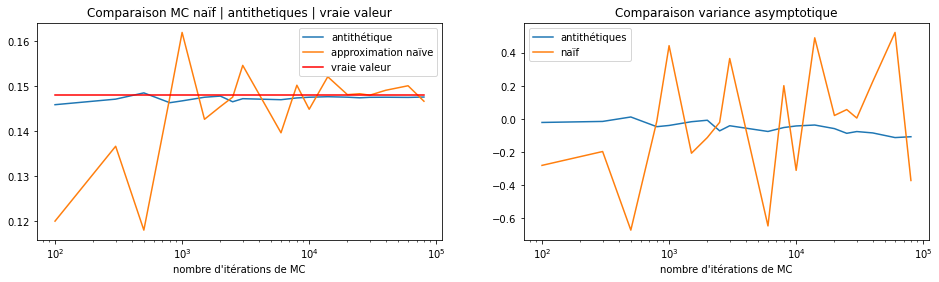

In [44]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

ax1.plot(val_n, val_pk_anti, label="antithétique")
ax1.plot(val_n, val_pk, label="approximation naïve")
ax1.plot(val_n, val_p, label="vraie valeur", color = "r")
ax1.set_title("Comparaison MC naïf | antithetiques | vraie valeur"); ax1.set_xlabel("nombre d'itérations de MC")
ax1.set_xscale("log")

ax2.plot(val_n, var_asympto_anti, label="antithétiques")
ax2.plot(val_n, var_asympto, label="naïf")
ax2.set_title("Comparaison variance asymptotique"); ax2.set_xlabel("nombre d'itérations de MC")
ax2.set_xscale("log")

ax1.legend(); ax2.legend(); plt.show()

L'utilisation de variables antithétiques nous permet une bien meilleur convergence. L'estimateur de la variance asymptotique était toujours plus faible que le naïf, il est préférable de passer par cette méthode.

$\mathbf{Q6})$ et $\mathbf{Q7})$ 

D'après la $\mathbf{Q4})$ :
$$
\begin{equation*}
    p = \frac{1}{2} - 2 \mathbb{E} \left[ \frac{1}{\pi \left( 1 + U^2 \right)} \right]
\end{equation*}
$$
On peut donc définir l'estimateur de p suivant : 
$$
\begin{equation*}
    \overline{p}_n = \frac{1}{2} - \frac{2}{n} \sum_{i=1}^{n} \frac{1}{\pi (1 + U_i)^2} \quad \left( U_i \right)_{ \{1 \leq i \leq n \} } \text{ une suite de v.a i.i.d de même loi que } U
\end{equation*}
$$
Montrons que cet estimateur est sans biais : 
$$
\begin{align*}
    \mathbb{E} \left[ \overline{p}_n -p \right] &= \mathbb{E} \left[ \overline{p}_n \right] - p \\
    &= \frac{1}{2} - \frac{2}{n} \sum_{i=1}^{n} \mathbb{E} \left[ \frac{1}{\pi (1 + U_i)^2} \right] - p \\
    &= \frac{1}{2} - 2 \mathbb{E} \left[ \frac{1}{\pi (1 + U_1)^2} \right] - p \quad \text{ les } U_i \text{ suivent la même loi} \\
    &= \frac{1}{2} -2 \mathbb{P} \left( 0 \leq X \leq 2 \right) - p \quad \mathbf{Q4}) \\
    &= p - p \quad \mathbf{Q4}) \\
    &= 0 
\end{align*}
$$
Donc $\overline{p}_n$ est un estimateur sans biais.      
Par le TCL, on sait que notre estimateur est asymptomatiquement normal. 

In [16]:
def estime_uniforme(Mc = n):
    
    sample = np.random.uniform(low = 0.0,high = 2.0, size = Mc)
    esp = densite_cauchy(sample)
    
    p = 1/2 - 2*esp.mean()
    return p

In [46]:
val_pk_uni = []
for n in val_n:
    val_pk_uni.append(estime_uniforme(n))
var_asympto_uni = np.sqrt(np.array(val_n))*(np.array(val_pk_uni) - p) 

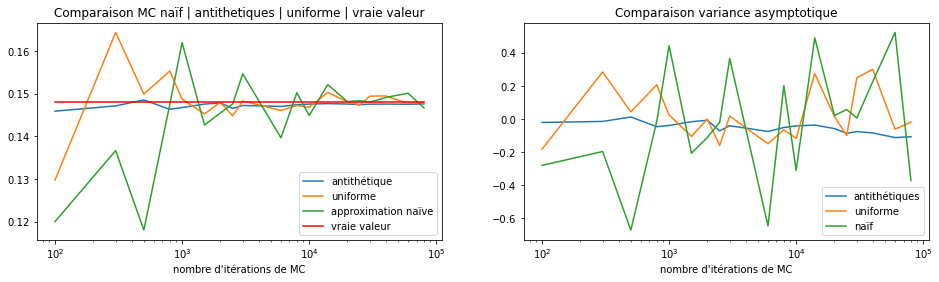

In [49]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

ax1.plot(val_n, val_pk_anti, label="antithétique")
ax1.plot(val_n, val_pk_uni, label = "uniforme")
ax1.plot(val_n, val_pk, label="approximation naïve")
ax1.plot(val_n, val_p, label="vraie valeur", color = "r")
ax1.set_title("Comparaison MC naïf | antithetiques | uniforme | vraie valeur"); ax1.set_xlabel("nombre d'itérations de MC")
ax1.set_xscale("log")

ax2.plot(val_n, var_asympto_anti, label="antithétiques")
ax2.plot(val_n, var_asympto_uni, label="uniforme")
ax2.plot(val_n, var_asympto, label="naïf")
ax2.set_title("Comparaison variance asymptotique"); ax2.set_xlabel("nombre d'itérations de MC")
ax2.set_xscale("log")

ax1.legend(); ax2.legend(); plt.show()

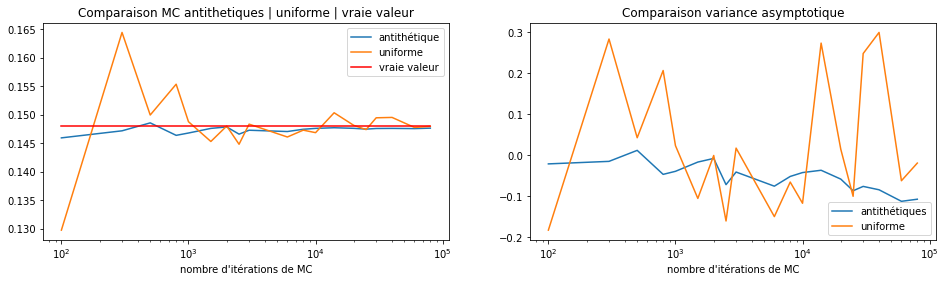

In [50]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

ax1.plot(val_n, val_pk_anti, label="antithétique")
ax1.plot(val_n, val_pk_uni, label = "uniforme")
ax1.plot(val_n, val_p, label="vraie valeur", color = "r")
ax1.set_title("Comparaison MC antithetiques | uniforme | vraie valeur"); ax1.set_xlabel("nombre d'itérations de MC")
ax1.set_xscale("log")

ax2.plot(val_n, var_asympto_anti, label="antithétiques")
ax2.plot(val_n, var_asympto_uni, label="uniforme")
ax2.set_title("Comparaison variance asymptotique"); ax2.set_xlabel("nombre d'itérations de MC")
ax2.set_xscale("log")

ax1.legend(); ax2.legend(); plt.show()

$\mathbf{Q8})$ 

L'estimateur le plus intéressant est sans aucun doute celui par variables antithétiques. En effet c'est celui dont la variance asymptotique est la plus faible et il ne requiert pas de tirages coûteux car il s'agit simplement de faire des tirage uniforme sur $[0;2]$ Donc pour un même coût, il produit de meilleurs résultats.